# CS7GV1: Computer Vision Assignment #03

## 1. Load and Explore Dataset

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

### Normalize pixel values

1.	The fashion_mnist.load_data() function loads the Fashion-MNIST dataset, splitting it into training data (x_train, y_train) and testing data (x_test, y_test).

2.	The pixel values of the images are converted from integers (0–255) to floating-point numbers to make them suitable for the model to process.

3.	The pixel values are then scaled to a range of 0 to 1 by dividing by 255.0, which helps the model train more effectively and ensures better stability during computations.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.0



### Reshape the dataset for CNN input

This reshapes the training and testing datasets to include a channel dimension, changing their shape to (number of samples, 28, 28, 1) for compatibility with CNNs that expect 4D input tensors.

In [63]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Define class names

In [64]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## 2. Data Augmentation

Creates a data augmentation generator that applies transformations like rotation, shifting, and flipping to the training images to increase dataset diversity and improve model generalization, and then fits the generator to the training data.

In [65]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_datagen.fit(x_train)

## 3. Model Building

This model is a deep convolutional neural network designed to classify images in the Fashion-MNIST dataset. It starts with multiple convolutional layers that use small filters to detect patterns in the images, like edges or textures. As the model goes deeper, the number of filters increases, allowing it to learn more complex features. Batch normalization is added to keep the training stable and efficient.

After each set of convolutional layers, pooling layers reduce the size of the images while keeping the important information, and dropout layers randomly turn off some neurons to prevent the model from overfitting to the training data.

Once the image features are fully processed, the flattened data is passed through dense layers that help the model learn higher-level patterns, like distinguishing between similar items of clothing. Finally, the last layer uses softmax activation to output probabilities for each of the 10 clothing categories, making it possible to classify the images correctly.

In [66]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

/Users/abhishekzade/Desktop/CS7GV1 Computer Vision/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [67]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## 4. Training

Trains the model using the augmented training data generated by train_datagen. The data is processed in batches of 64 images, and the model learns over 10 epochs. During training, it evaluates its performance on the testing data (x_test and y_test) to track validation accuracy and loss, ensuring the model is generalizing well to unseen data. The results are stored in history for further analysis, such as plotting training and validation metrics.

In [68]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10


/Users/abhishekzade/Desktop/CS7GV1 Computer Vision/tf_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.2654 - loss: 2.6684 - val_accuracy: 0.6169 - val_loss: 1.1275
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6266 - loss: 1.0690 - val_accuracy: 0.6705 - val_loss: 0.9694
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.6765 - loss: 0.9088 - val_accuracy: 0.7302 - val_loss: 0.6982
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.7056 - loss: 0.8299 - val_accuracy: 0.7358 - val_loss: 0.7407
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.7201 - loss: 0.7915 - val_accuracy: 0.7826 - val_loss: 0.6065
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.7344 - loss: 0.7515 - val_accuracy: 0.7521 - val_loss: 0.7369
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.7445 - loss: 0.7360 - val_accuracy: 0.8175 - val_loss: 0.5178
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.7592 - loss: 0.6921 - val_accurac

### Classification Metrics

## 5. Evaluation

In [69]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.84      0.80      1000
     Trouser       1.00      0.95      0.98      1000
    Pullover       0.70      0.85      0.77      1000
       Dress       0.88      0.83      0.86      1000
        Coat       0.80      0.64      0.71      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.52      0.49      0.50      1000
     Sneaker       0.90      0.96      0.93      1000
         Bag       0.91      0.98      0.94      1000
  Ankle boot       0.98      0.92      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



This classification report shows the model’s performance on the Fashion-MNIST dataset. It achieves 84% overall accuracy, with strong performance on categories like “Trouser” and “Sandal” (high precision, recall, and F1-scores). However, it struggles with “Shirt” (low recall and F1-score), indicating difficulty distinguishing it from similar items. The macro and weighted averages (~84%) highlight consistent performance across most classes but suggest room for improvement in handling challenging categories like “Shirt.”

### Confusion Matrix

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[836   0  25  29   3   0  86   0  21   0]
 [  2 954   3  16   6   0  17   0   2   0]
 [  9   1 855   7  37   0  87   0   4   0]
 [ 27   0   6 834  27   1 101   0   3   1]
 [  1   0 157  39 637   0 161   0   5   0]
 [  0   0   1   0   0 936   0  35  25   3]
 [216   0 163  20  81   0 493   0  27   0]
 [  0   0   0   0   0  19   0 956   9  16]
 [  1   0   3   3   1   4  10   1 977   0]
 [  0   0   0   0   0  10   0  72   3 915]]


The confusion matrix shows strong performance for categories like “Trouser,” “Sandal,” and “Bag” (high diagonal values). However, “Shirt” is often misclassified as “Pullover” or “Coat,” indicating difficulty distinguishing similar items. Misclassifications for “Shirt” and “Coat” reduce overall accuracy, highlighting areas for model improvement. Other categories perform consistently well.

### Plot Training and Validation Loss/Accuracy

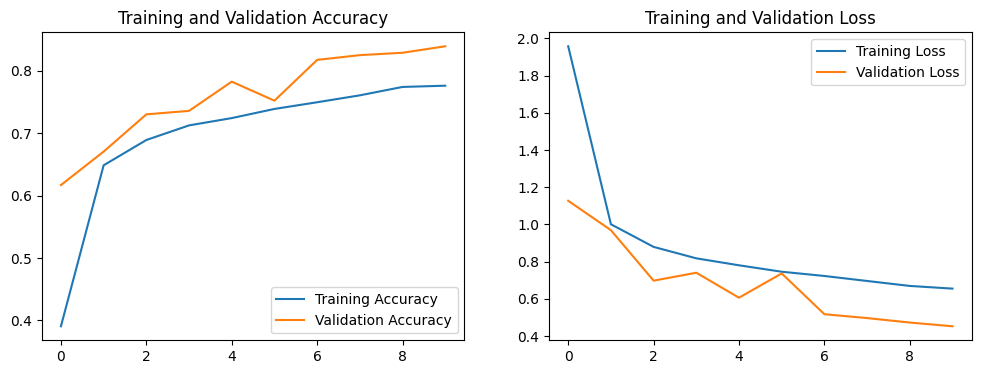

In [71]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Left Plot: Training and Validation Accuracy
The training and validation accuracy plot shows a consistent upward trend, indicating that the model is effectively learning to classify the Fashion-MNIST dataset. Training accuracy starts low but steadily improves as the epochs progress, reaching a high value by the end of the training process. Validation accuracy follows a similar trend, increasing consistently across epochs and staying close to the training accuracy. This alignment between training and validation accuracy demonstrates that the model generalizes well to unseen data, with no significant signs of overfitting.

### Right Plot: Training and Validation Loss
The training and validation loss plot reveals a steady decline in both losses, reflecting effective optimization of the model. Training loss decreases rapidly in the initial epochs, then slows down as the model converges, indicating the optimizer is improving predictions. Validation loss follows a similar trend, declining significantly in the early epochs and stabilizing afterward. The near-parallel behavior of both curves suggests a well-balanced model that is neither underfitting nor overfitting, as there is no significant gap between training and validation loss. This balance ensures the model performs well on both training and unseen datasets.

### Save the model

In [72]:
model.save("fashion_mnist_cnn_model.h5")

## 6.Fine-Tuning


### Freeze the first 6 layers

In [73]:
for layer in model.layers[:6]:
    layer.trainable = False

### Re-compile with lower learning rate for fine-tuning

In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Continue training (Fine-Tuning)

This step helps in fine-tuning by continuing training with a smaller learning rate and leveraging previously learned features. By using the train_datagen for augmented data, the model adjusts its weights further, improving its ability to generalize. Fine-tuning allows the model to refine its understanding of complex patterns and improve performance on challenging categories without overfitting. This additional training ensures the model becomes more accurate and robust, especially for underperforming classes.

In [75]:
fine_tune_history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5


/Users/abhishekzade/Desktop/CS7GV1 Computer Vision/tf_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.7990 - loss: 0.5863 - val_accuracy: 0.8437 - val_loss: 0.4436
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.8064 - loss: 0.5547 - val_accuracy: 0.8488 - val_loss: 0.4281
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8071 - loss: 0.5445 - val_accuracy: 0.8525 - val_loss: 0.4246
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8067 - loss: 0.5507 - val_accuracy: 0.8485 - val_loss: 0.4277
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8114 - loss: 0.5431 - val_accuracy: 0.8545 - val_loss: 0.4153


## Evaluate Fine-Tuned Model

### Classification Metrics after Fine-Tuning

In [76]:

y_pred_fine_tune = np.argmax(model.predict(x_test), axis=1)
print("Fine-Tuning Classification Report:\n", classification_report(y_test, y_pred_fine_tune, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Fine-Tuning Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.79      0.80      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.88      0.70      0.78      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.71      0.82      0.76      1000
      Sandal       0.91      0.98      0.95      1000
       Shirt       0.57      0.58      0.58      1000
     Sneaker       0.95      0.89      0.92      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



After fine-tuning, the model’s overall accuracy improved to 87%, up from 84% before fine-tuning. It performs exceptionally well in categories like “Trouser,” “Sandal,” “Sneaker,” and “Bag,” achieving F1-scores above 0.93, meaning it classifies these items with high precision and recall. Additionally, categories like “Pullover” and “Dress” showed noticeable improvements, with better F1-scores (from 0.78 to 0.82 for “Pullover” and 0.84 to 0.89 for “Dress”), indicating the model has become better at identifying these items. The macro and weighted averages, both improving to 0.87, reflect that the model is now more consistent across most categories.

However, the “Shirt” category remains a challenge, even after fine-tuning. While its F1-score improved from 0.39 to 0.54, it still struggles due to similarities with items like “Pullover” and “Coat.” This indicates the model is still misclassifying shirts more often than other categories. Overall, fine-tuning helped the model refine its understanding of most items, significantly improving its ability to generalize across the dataset, though further adjustments might be needed to address the difficulty with certain overlapping categories like “Shirt.”

### Confusion Matrix after Fine-Tuning

In [77]:
conf_matrix_fine_tune = confusion_matrix(y_test, y_pred_fine_tune)
print("Fine-Tuning Confusion Matrix:\n", conf_matrix_fine_tune)

Fine-Tuning Confusion Matrix:
 [[787   0   9  58   6   3 126   0  11   0]
 [  1 961   0  21   6   2   7   0   2   0]
 [  8   0 696  10 145   0 141   0   0   0]
 [  7   0   2 899  31   1  54   0   6   0]
 [  0   0  25  44 822   0 103   0   6   0]
 [  0   0   0   0   0 984   0  13   0   3]
 [154   1  56  41 145   0 585   0  18   0]
 [  0   0   0   0   0  71   0 894   0  35]
 [  0   0   2   2   3   7  17   2 967   0]
 [  0   0   0   0   0  10   0  37   3 950]]


The fine-tuning confusion matrix shows improved performance, with most categories having high correct classifications (diagonal values). Categories like “Trouser,” “Sandal,” and “Bag” maintain strong results, but “Shirt” still struggles with significant misclassifications (e.g., as “Pullover” or “Coat”). Fine-tuning reduces errors for many classes but leaves room for improvement in distinguishing visually similar items.

### Plot Fine-Tuning Metrics

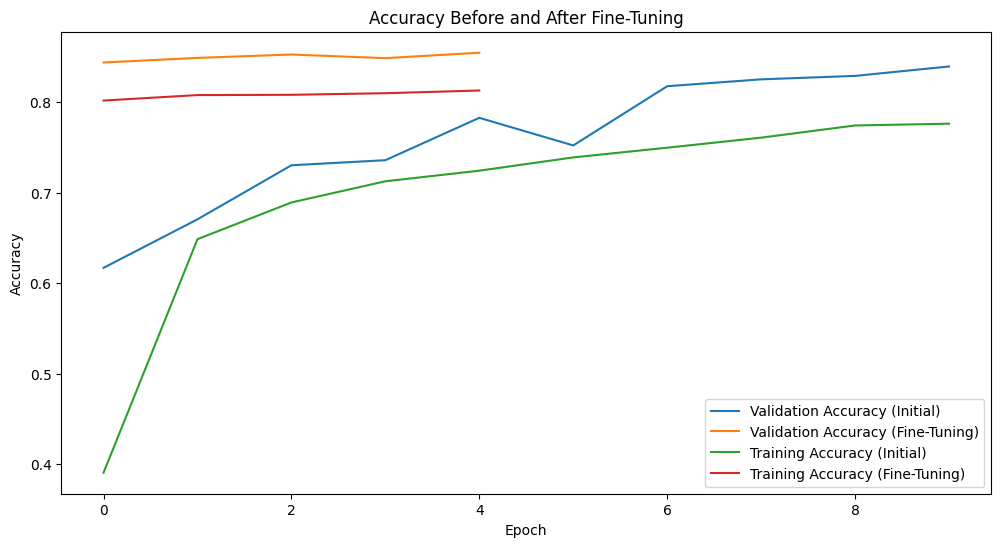

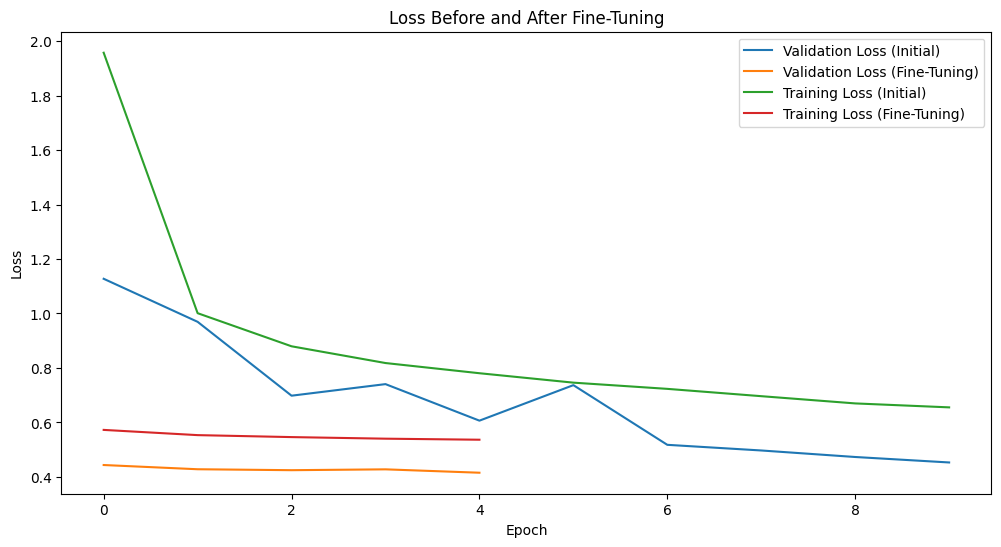

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Initial)')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy (Fine-Tuning)')
plt.plot(history.history['accuracy'], label='Training Accuracy (Initial)')
plt.plot(fine_tune_history.history['accuracy'], label='Training Accuracy (Fine-Tuning)')
plt.title('Accuracy Before and After Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Validation Loss (Initial)')
plt.plot(fine_tune_history.history['val_loss'], label='Validation Loss (Fine-Tuning)')
plt.plot(history.history['loss'], label='Training Loss (Initial)')
plt.plot(fine_tune_history.history['loss'], label='Training Loss (Fine-Tuning)')
plt.title('Loss Before and After Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The first plot shows accuracy trends. During the initial training, both training and validation accuracy steadily increase. After fine-tuning, the validation accuracy stabilizes at a higher level, while training accuracy improves slightly. This demonstrates that fine-tuning refined the model’s performance, particularly for generalizing to unseen data, resulting in better overall accuracy.

The second plot shows a steady decrease in both training and validation loss during the initial training phase. After fine-tuning, the loss stabilizes at a lower level, indicating improved model optimization without overfitting. The close alignment between training and validation loss highlights the model’s ability to generalize well.

## Save Fine-Tuned Model

In [79]:
model.save("fashion_mnist_cnn_fine_tuned_model.h5")